In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
def parse_array(value):
    print(value)
    if value[0] == '[':
        if value[1] != ']':
            value = [float(val) for val in value[1:-1].split(",")]
        else:
            value = []
        return value
    return value

In [98]:
link = "./runs.txt"
runs = []
cols = ["date"]
def r_file(link):
    file = open(link)
    run = {}
    for line in file:
        if line == "\n" or line == "":
            continue
        if line[0] == '#':
            if run != []:
                runs.append(run.copy())
                run = {}
        else:
            if "F1-score" in line or "array" in line:
                continue
            elif '=' in line:
                index = line.split("=")[0][:]
                value = line.split("=")[1][:-1]
                value = parse_array(value)
                run[index.lower()] = value
            
        if line[0] != '#' and line[0] != 'O':
            if not index.lower() in cols:
                cols.append(index.lower())
    if run:
        runs.append(run)

In [99]:
r_file("../runs.txt")

Tue Dec 20 15:58:04 2016:
100
[32, 64, 128, 256]
100
100
43212
64
0.2
[512]
0.005
0.7
False
1
0
0.801658163265
[2.5887134, 0.93452621, 0.78742522, 0.58751249, 0.54680109, 0.46205288, 0.40395689, 0.2742511, 0.37235802, 0.39262286, 0.29362231, 0.38200262, 0.29537779, 0.38407952, 0.24170691, 0.27747577, 0.17919251, 0.2255729, 0.21246785, 0.21681245, 0.23982424, 0.1562064, 0.26806143, 0.20251855, 0.22421533, 0.21715222, 0.2093396, 0.17736378, 0.17730734, 0.17556319, 0.21901426, 0.17916439, 0.17831273, 0.16446108, 0.1648455, 0.15843157, 0.14255862, 0.12108459, 0.1957536, 0.10734496, 0.12053527, 0.1393853, 0.2742857, 0.16765451, 0.21186906, 0.16013487, 0.11968781, 0.134454, 0.14253882, 0.10020929, 0.12951748, 0.12860622, 0.11504449, 0.16113415, 0.098650642, 0.15065458, 0.20050056, 0.16519812, 0.14699367, 0.24175303, 0.13020292, 0.14827093, 0.13317411, 0.16853601, 0.13464338, 0.12026677, 0.11692631, 0.099290237, 0.1045702, 0.10534911, 0.094085805, 0.10340854, 0.1053334, 0.095350206, 0.1030076

In [100]:
cols

['date',
 'epoch_stop',
 'conv_depth',
 'num_epoch',
 'training_size',
 'seed',
 'batch_size',
 'validation_val_perc',
 'fc_depth',
 'theta_thresh',
 'validation_train_perc',
 'rotate_images',
 'fc_arch',
 'img_border',
 'accuracy_test',
 'loss_taining',
 'validation_test_perc',
 'accuracy_training',
 'nbr_rotated_img',
 'accuracy_validation',
 'conv_arch']

In [101]:
runs_df = pd.DataFrame(columns=cols)

In [102]:
for i, run in enumerate(runs):
    runs_df.loc[i] = run

In [103]:
runs_df

,date,epoch_stop,conv_depth,num_epoch,training_size,seed,batch_size,validation_val_perc,fc_depth,theta_thresh,...,rotate_images,fc_arch,img_border,accuracy_test,loss_taining,validation_test_perc,accuracy_training,nbr_rotated_img,accuracy_validation,conv_arch
0,Tue Dec 20 15:58:04 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,False,1,0,0.801658163265,"[2.5887134, 0.93452621, 0.78742522, 0.58751249...",0.1,"[0.501012323943662, 0.7648327464788732, 0.7839...",55,"[0.7358896683673469, 0.7129304846938775, 0.807...","[1.0, 1.0]"
1,Tue Dec 20 15:53:47 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,False,1,0,0.793526785714,"[4.3707552, 0.86126041, 0.8238309, 0.59297585,...",0.1,"[0.501012323943662, 0.7904929577464789, 0.7986...",55,"[0.7358896683673469, 0.7722417091836735, 0.820...","[2.0, 2.0]"
2,Tue Dec 20 16:12:04 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,False,1,0,0.804528061224,"[293.10471, 0.877446, 0.92566156, 0.73233145, ...",0.1,"[0.49898767605633804, 0.6607834507042254, 0.66...",55,"[0.2641103316326531, 0.5420918367346939, 0.718...","[2.0, 4.0, 4.0, 4.0]"
3,Tue Dec 20 16:25:33 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,False,1,8,0.848214285714,"[6.2759771, 2.1068811, 1.4012392, 0.90688241, ...",0.1,"[0.501012323943662, 0.8382482394366197, 0.8507...",55,"[0.7358896683673469, 0.8397640306122449, 0.848...","[1.0, 1.0]"
4,Tue Dec 20 16:40:42 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,False,1,16,0.878826530612,"[11.674794, 4.0699873, 2.3925416, 1.4962677, 1...",0.1,"[0.5010563380281691, 0.857262323943662, 0.8942...",55,"[0.7358896683673469, 0.8232621173469388, 0.844...","[1.0, 1.0]"
5,Tue Dec 20 17:09:29 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.005,...,True,1,16,0.883822278912,"[10.863062, 3.302494, 1.6268564, 1.0232743, 0....",0.1,"[0.49912014563106794, 0.8466626213592233, 0.87...",50,"[0.2531463310580205, 0.8347909556313993, 0.801...","[1.0, 1.0]"
6,Tue Dec 20 18:03:08 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,145,43212,64,0.2,[512.0],0.005,...,False,1,16,0.874779929577,"[11.110373, 3.1395254, 1.7368128, 0.96907508, ...",0.1,"[0.49957851637764933, 0.833092485549133, 0.858...",50,"[0.266175176056338, 0.7841109154929577, 0.7788...","[1.0, 1.0]"
7,Tue Dec 20 18:28:36 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,145,43212,64,0.2,[512.0],0.005,...,True,1,16,0.888661649215,"[11.32261, 2.3618703, 1.0351865, 0.72480488, 0...",0.1,"[0.4997993937232525, 0.8271219686162625, 0.868...",50,"[0.2599245406824147, 0.8303395669291339, 0.835...","[1.0, 1.0]"
8,Tue Dec 20 18:44:49 2016:,100,"[32.0, 64.0, 128.0, 256.0]",100,100,43212,64,0.2,[512.0],0.01,...,False,1,16,0.897480867347,"[11.674789, 4.0285916, 2.3970697, 1.4888339, 1...",0.1,"[0.5010563380281691, 0.8424735915492958, 0.896...",50,"[0.7358896683673469, 0.7942442602040817, 0.836...","[1.0, 1.0]"


arch : [1.0, 1.0]
borders = 0
test accuracy = 0.801658163265
rotated images = 0
training size = 100


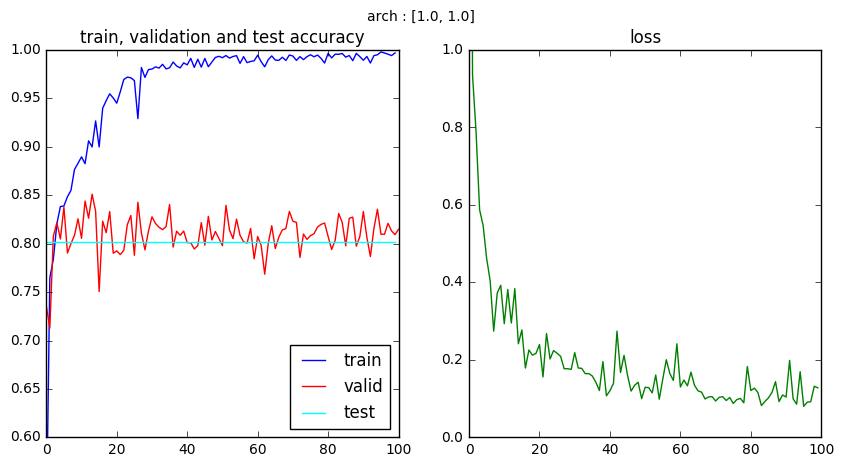

arch : [2.0, 2.0]
borders = 0
test accuracy = 0.793526785714
rotated images = 0
training size = 100


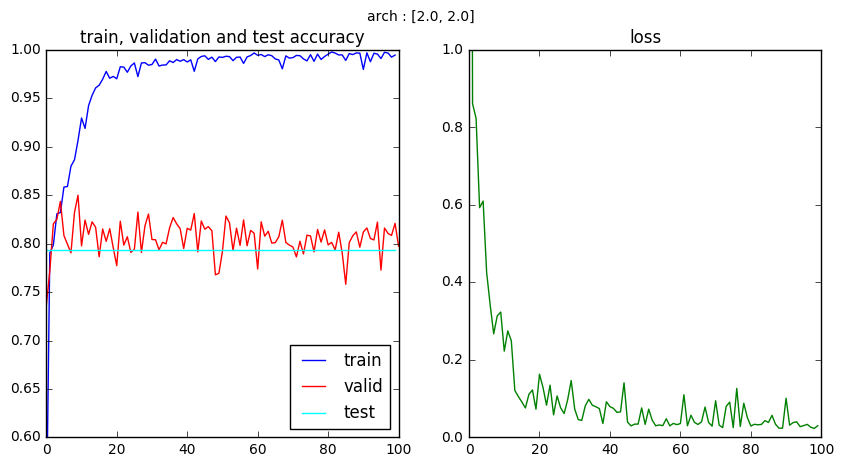

arch : [2.0, 4.0, 4.0, 4.0]
borders = 0
test accuracy = 0.804528061224
rotated images = 0
training size = 100


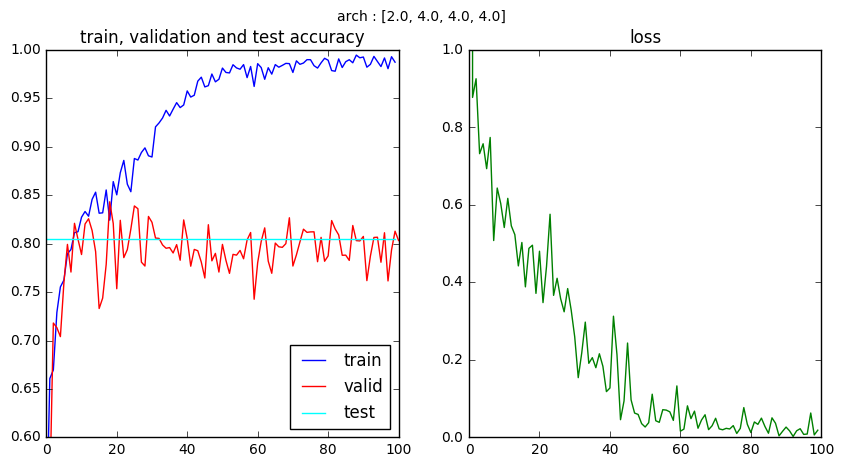

arch : [1.0, 1.0]
borders = 8
test accuracy = 0.848214285714
rotated images = 0
training size = 100


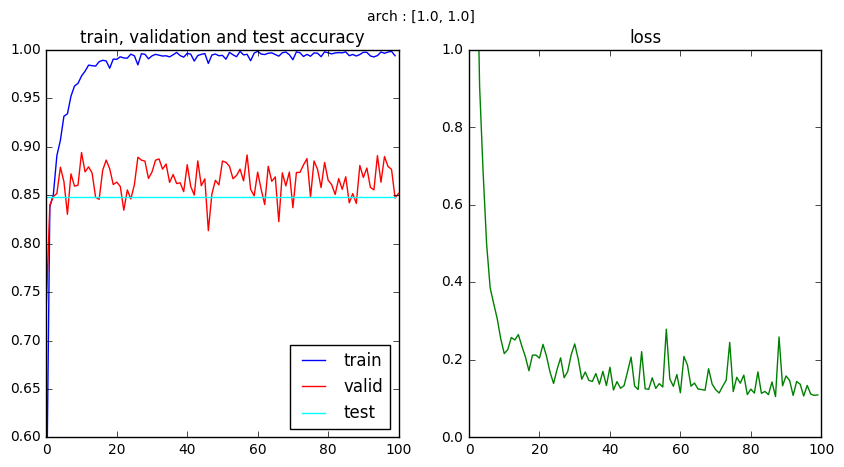

arch : [1.0, 1.0]
borders = 16
test accuracy = 0.878826530612
rotated images = 0
training size = 100


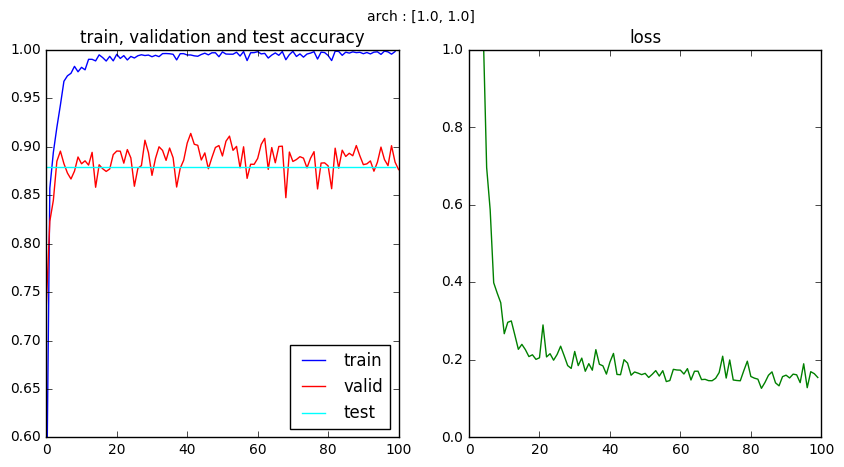

arch : [1.0, 1.0]
borders = 16
test accuracy = 0.883822278912
rotated images = 50
training size = 100


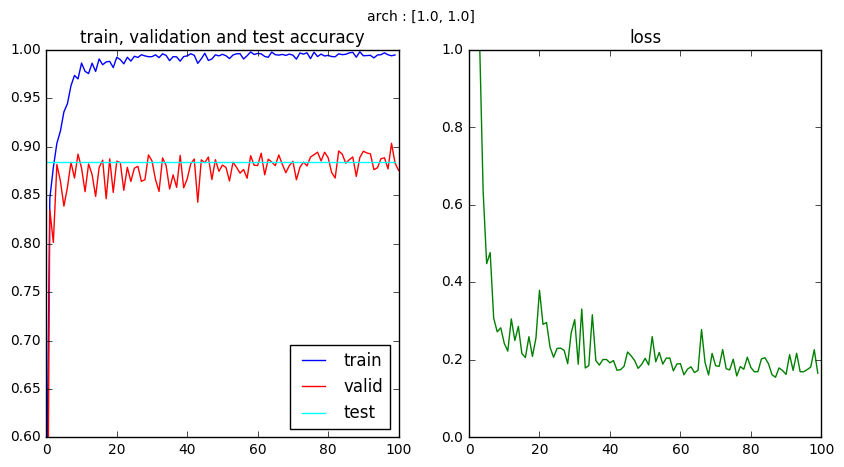

arch : [1.0, 1.0]
borders = 16
test accuracy = 0.874779929577
rotated images = 0
training size = 145


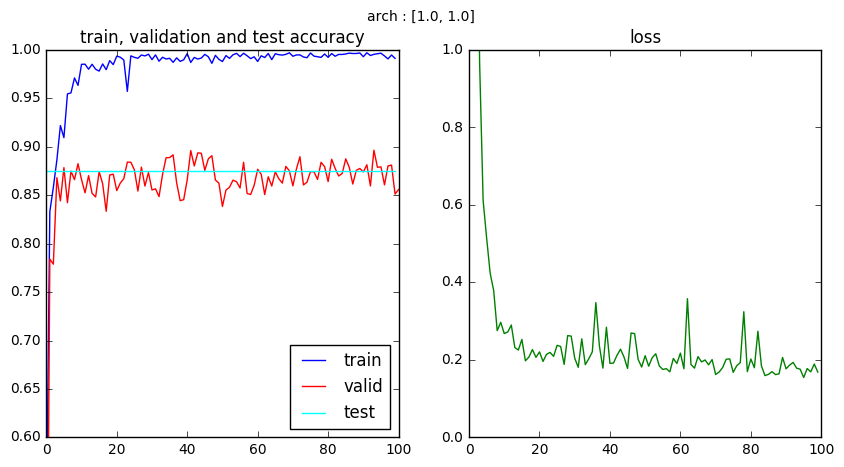

arch : [1.0, 1.0]
borders = 16
test accuracy = 0.888661649215
rotated images = 50
training size = 145


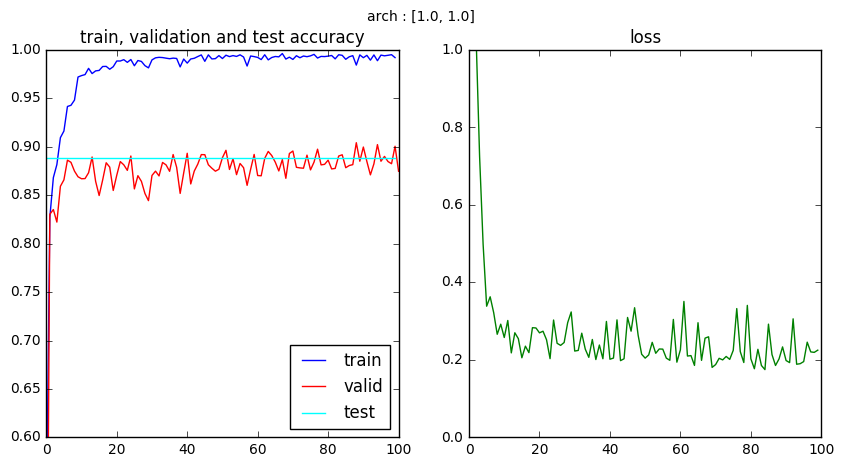

arch : [1.0, 1.0]
borders = 16
test accuracy = 0.897480867347
rotated images = 0
training size = 100


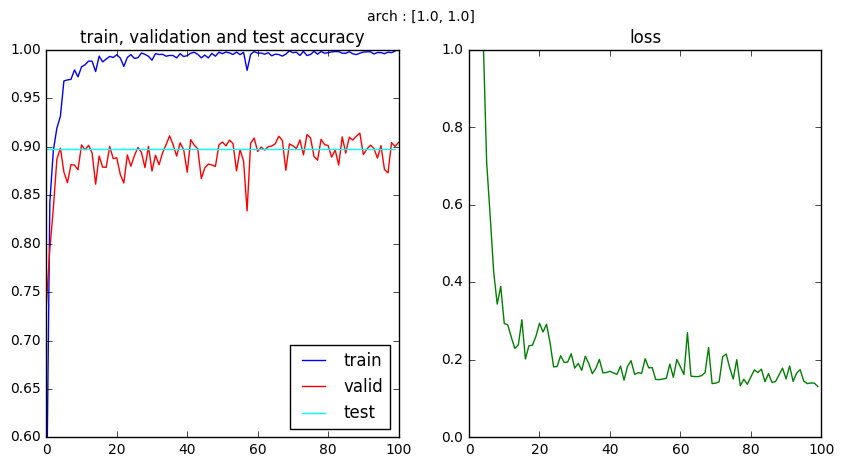

In [133]:
df = runs_df[["conv_arch", "loss_taining","accuracy_training", "accuracy_validation", "img_border", "rotate_images", "nbr_rotated_img", "training_size", "accuracy_test"]]

for a in df.values:
    
    print("arch : " + str(a[0]))
    print("borders = " + str(a[4]))
    print("test accuracy = " + str(a[8]))
    
    if a[5] == "True":
        rot = a[6]
    else:
        rot = '0'
        
    print("rotated images = " + rot)
    print("training size = " + a[7])

    
    plt.figure(figsize=(10,5))
    plt.suptitle("arch : " + str(a[0]))
    plt.subplot(121)
    plt.title("train, validation and test accuracy")
    plt.ylim(0.6,1)
    plt.plot(a[2], "b", label='train')
    plt.plot(a[3], "r", label='valid')
    plt.plot([a[8]]*100, "cyan", label="test")
    plt.legend(loc="lower right")
    plt.subplot(122)
    plt.title("loss")
    plt.ylim(0,1)
    plt.plot(a[1], "g", label='loss')
    plt.show()